# Machine Learning Model to predict the Used Car Price

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('Raw_Data.xlsx')

In [3]:
df.head()

,Car_Model,Car,City_Map,OEM_NAME,Ex_Showroom_Price,Brand,Fuel_Type,Car_Type,Model_Year,Price,Mileage,FTB,City
0,XUV500,mahindra xuv500 w8 fwd,Kolkata,MAHINDRA XUV500 W8 4X2,1335000,Mahindra,Diesel,Mid Size SUV,2013,582000.0,50074,Non-Petrol,Kolkata
1,XUV500,mahindra xuv500 w8 fwd,Delhi-NCR,MAHINDRA XUV500 W8 4X2,1257000,Mahindra,Diesel,Mid Size SUV,2012,532000.0,85086,Non-Petrol,Ghaziabad
2,XUV500,mahindra xuv500 w6 2013,Delhi-NCR,MAHINDRA XUV500 W6,1186000,Mahindra,Diesel,Mid Size SUV,2013,441000.0,70000,Non-Petrol,Delhi
3,XUV500,mahindra xuv500 w6 4 x 2,Delhi-NCR,MAHINDRA XUV500 W6 4X2,1376000,Mahindra,Diesel,Mid Size SUV,2016,815900.0,45000,Non-Petrol,New Delhi
4,XUV500,mahindra xuv500 w8 4wd 2011,Delhi-NCR,MAHINDRA XUV500 W8 4X4,1309954,Mahindra,Diesel,Mid Size SUV,2011,648550.0,65000,Non-Petrol,Delhi


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10332 entries, 0 to 10331
Data columns (total 13 columns):
Car_Model            10332 non-null object
Car                  10332 non-null object
City_Map             10332 non-null object
OEM_NAME             10332 non-null object
Ex_Showroom_Price    10332 non-null int64
Brand                10332 non-null object
Fuel_Type            10332 non-null object
Car_Type             10332 non-null object
Model_Year           10332 non-null int64
Price                10332 non-null float64
Mileage              10332 non-null int64
FTB                  10332 non-null object
City                 10252 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 1.0+ MB


In [5]:
df.shape

(10332, 13)

In [6]:
df.describe()

,Ex_Showroom_Price,Model_Year,Price,Mileage
count,1.033200e+04,10332.000000,1.033200e+04,10332.000000
mean,7.116761e+05,2013.530972,4.642527e+05,51518.086624
std,2.777238e+05,1.760104,2.232575e+05,21819.720354
min,2.331720e+05,2011.000000,7.320000e+04,65.000000
25%,4.960000e+05,2012.000000,3.025000e+05,35718.000000
50%,6.528330e+05,2013.000000,4.213225e+05,51500.000000
75%,9.070000e+05,2015.000000,5.818938e+05,67329.250000
max,1.875000e+06,2018.000000,1.935000e+06,100000.000000


In [7]:
df.describe(include=['O'])

,Car_Model,Car,City_Map,OEM_NAME,Brand,Fuel_Type,Car_Type,FTB,City
count,10332,10332,10332,10332,10332,10332,10332,10332,10252
unique,20,2379,8,484,7,17,7,2,621
top,I20,maruti suzuki wagon r 1.0 lxi cng,Delhi-NCR,MARUTI SUZUKI SWIFT VDI,Maruti Suzuki,Petrol,Hatchbacks,Non-Petrol,Delhi
freq,881,93,4346,394,3395,4012,4077,6312,1263


# After analyzing dataset we can conclude that:
    
1) Price is the Target Variable and remaining 12 variables are independent variables that will help to predict Price of Used Car.

2) City_Map is derived from 'City',

   OEM_NAME ,Car_Model and Brand are derived from 'Car',
   
   FTB is derived from 'Fuel_Type'.
   
   Hence let's drop variables that are redundant like Car,City and Fuel_Type.

In [8]:
df.drop(['Car','Fuel_Type','City','OEM_NAME','Car_Model'],axis=1,inplace=True)

In [9]:
df.head()

,City_Map,Ex_Showroom_Price,Brand,Car_Type,Model_Year,Price,Mileage,FTB
0,Kolkata,1335000,Mahindra,Mid Size SUV,2013,582000.0,50074,Non-Petrol
1,Delhi-NCR,1257000,Mahindra,Mid Size SUV,2012,532000.0,85086,Non-Petrol
2,Delhi-NCR,1186000,Mahindra,Mid Size SUV,2013,441000.0,70000,Non-Petrol
3,Delhi-NCR,1376000,Mahindra,Mid Size SUV,2016,815900.0,45000,Non-Petrol
4,Delhi-NCR,1309954,Mahindra,Mid Size SUV,2011,648550.0,65000,Non-Petrol


In [10]:
df.describe(include=['O'])

,City_Map,Brand,Car_Type,FTB
count,10332,10332,10332,10332
unique,8,7,7,2
top,Delhi-NCR,Maruti Suzuki,Hatchbacks,Non-Petrol
freq,4346,3395,4077,6312


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10332 entries, 0 to 10331
Data columns (total 8 columns):
City_Map             10332 non-null object
Ex_Showroom_Price    10332 non-null int64
Brand                10332 non-null object
Car_Type             10332 non-null object
Model_Year           10332 non-null int64
Price                10332 non-null float64
Mileage              10332 non-null int64
FTB                  10332 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 645.9+ KB


# Re-ordering the columns

In [12]:
df = df[['Brand','Car_Type','FTB','City_Map','Model_Year','Mileage','Ex_Showroom_Price','Price']]

In [13]:
df.head()

,Brand,Car_Type,FTB,City_Map,Model_Year,Mileage,Ex_Showroom_Price,Price
0,Mahindra,Mid Size SUV,Non-Petrol,Kolkata,2013,50074,1335000,582000.0
1,Mahindra,Mid Size SUV,Non-Petrol,Delhi-NCR,2012,85086,1257000,532000.0
2,Mahindra,Mid Size SUV,Non-Petrol,Delhi-NCR,2013,70000,1186000,441000.0
3,Mahindra,Mid Size SUV,Non-Petrol,Delhi-NCR,2016,45000,1376000,815900.0
4,Mahindra,Mid Size SUV,Non-Petrol,Delhi-NCR,2011,65000,1309954,648550.0


Now we have 'Price' as a continuous target/dependent variable and rest 8(6 categorical and 2 continuous) variables are predictor/independent variables.

# Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot

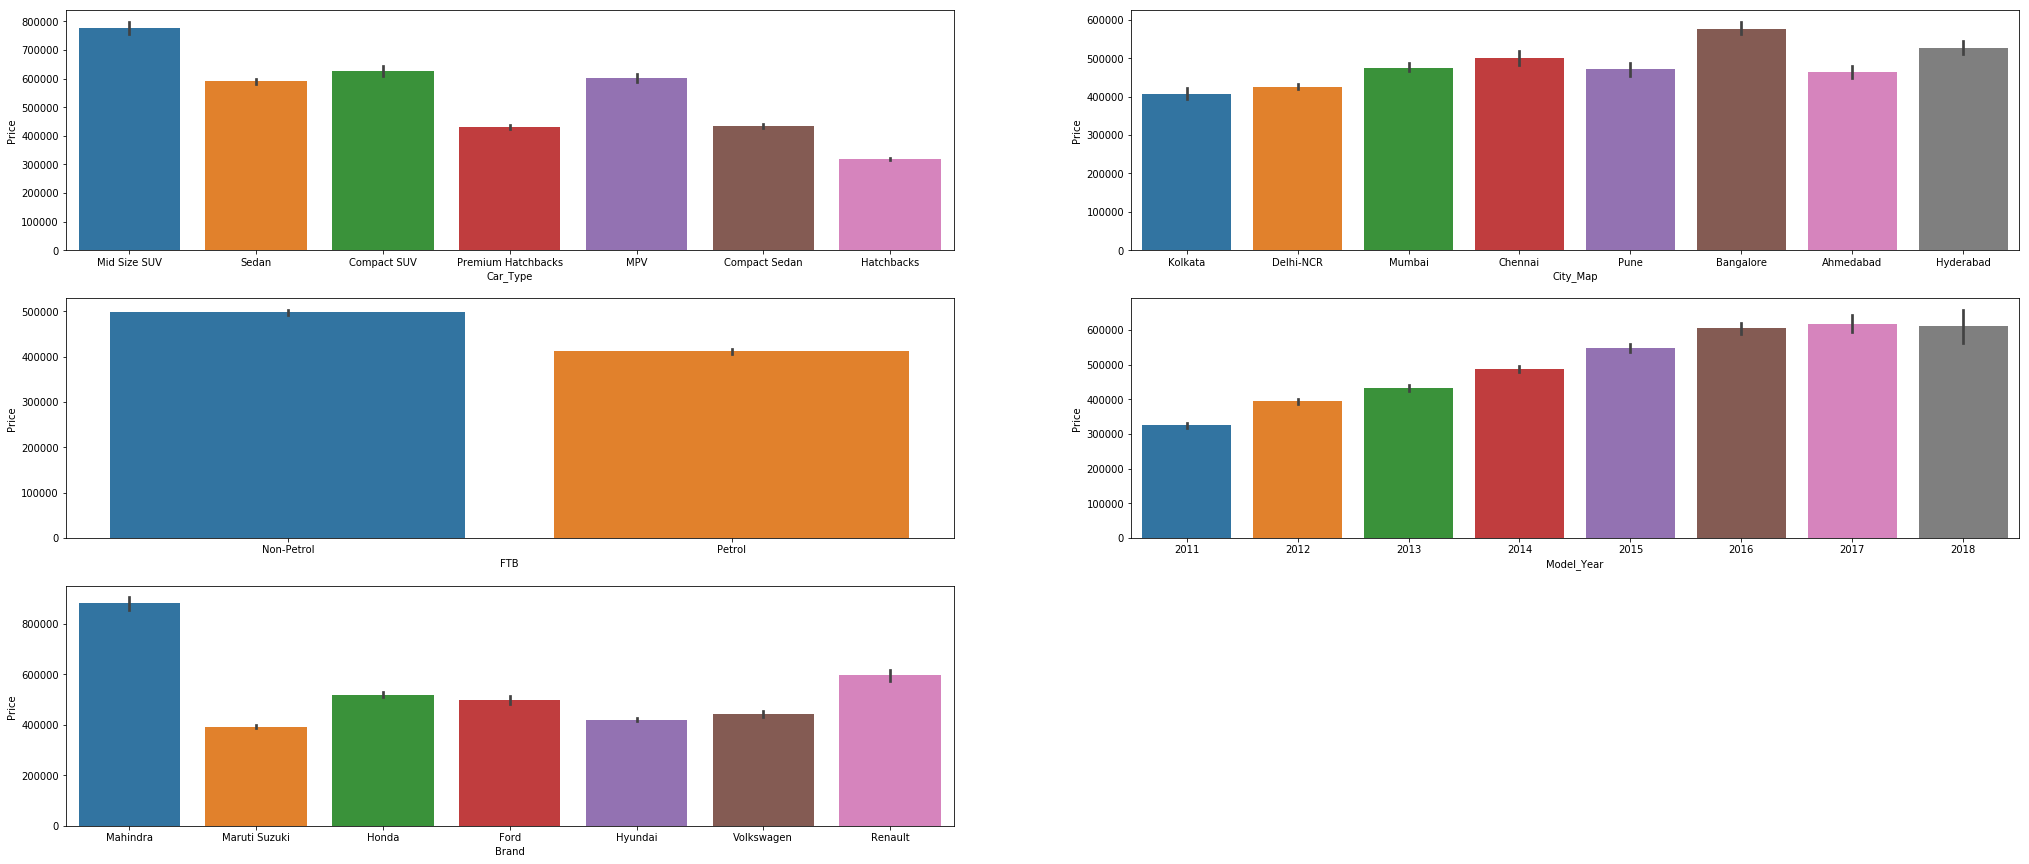

In [15]:
plt.figure(figsize=(35,15))
plt.subplot(321)
sns.barplot(x='Car_Type',y='Price',data=df)
plt.subplot(322)
sns.barplot(x='City_Map',y='Price',data=df)
plt.subplot(323)
sns.barplot(x='FTB',y='Price',data=df)
plt.subplot(324)
sns.barplot(x='Model_Year',y='Price',data=df)
plt.subplot(325)
sns.barplot(x='Brand',y='Price',data=df)
plt.show()

# Countplot

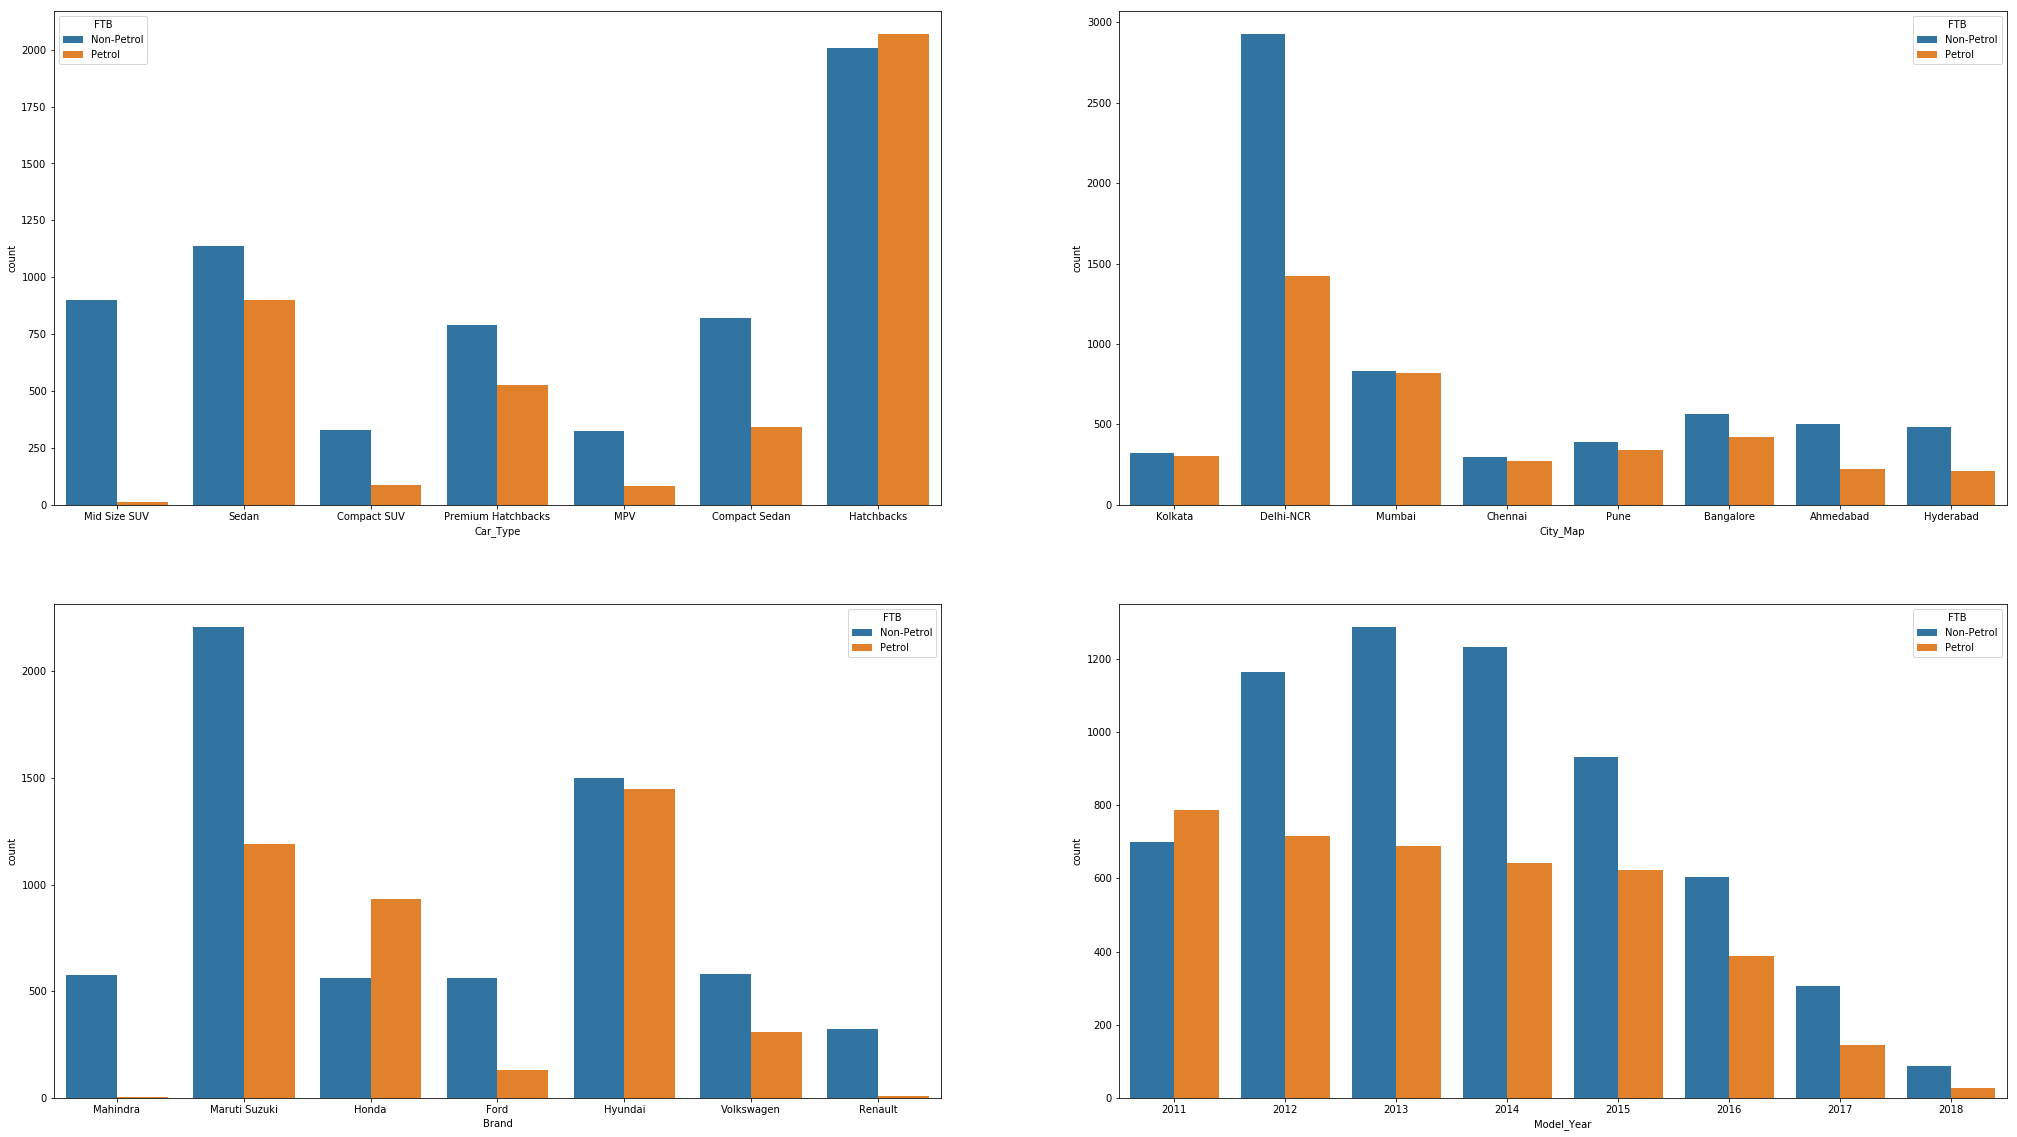

In [16]:
plt.figure(figsize=(35,20))
plt.subplot(221)
sns.countplot(x='Car_Type',data=df,hue='FTB')
plt.subplot(222)
sns.countplot(x='City_Map',data=df,hue='FTB')
plt.subplot(223)
sns.countplot(x='Brand',data=df,hue='FTB')
plt.subplot(224)
sns.countplot(x='Model_Year',data=df,hue='FTB')
plt.show()

# Strip plot

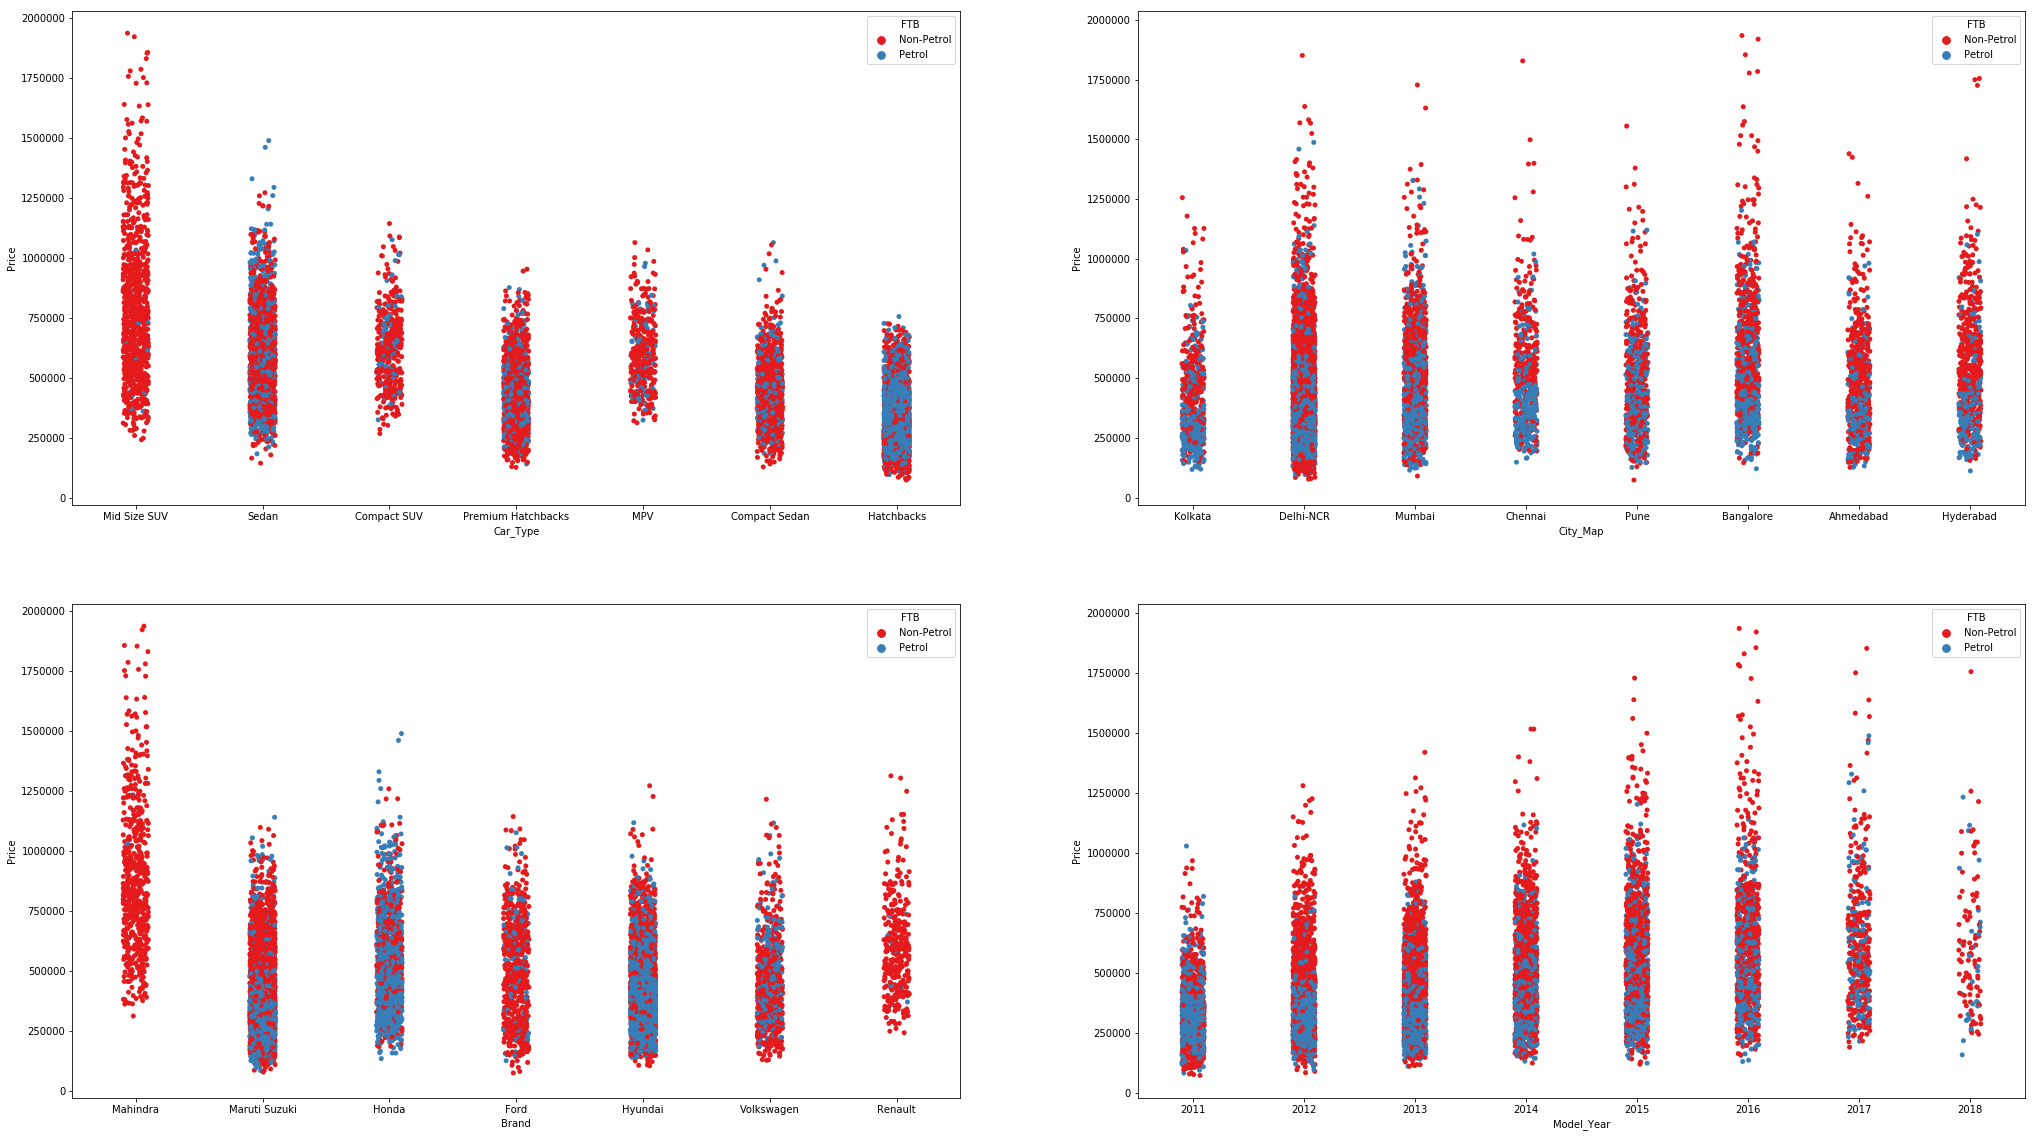

In [17]:
plt.figure(figsize=(35,20))
plt.subplot(221)
sns.stripplot(x='Car_Type',y='Price',data=df,jitter=True,hue='FTB',palette='Set1')
plt.subplot(222)
sns.stripplot(x='City_Map',y='Price',data=df,jitter=True,hue='FTB',palette='Set1')
plt.subplot(223)
sns.stripplot(x='Brand',y='Price',data=df,jitter=True,hue='FTB',palette='Set1')
plt.subplot(224)
sns.stripplot(x='Model_Year',y='Price',data=df,jitter=True,hue='FTB',palette='Set1')
plt.show()

# Because Our target variable is continuous its a regression problem.

and it requires numerical input,if dataset contains categorical variables then we have to encode them.

Here we have 6 categorical variables and remaining 3 are numerical variables.Let's encode categorical variables.

# Feature engineering(Variable Creation)

Approach 1 - Find and Replace(Pandas makes it easy for us to directly replace the text values with their numeric equivalent by using replace)

Approach 2 - Label Encoding(Another approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number)Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms

Approach 3 - One Hot Encoding(A common alternative approach is called one hot encoding (but also goes by several different names shown below). Despite the different names, the basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set)

Approach 4 - Custom Binary Encoding(Depending on the data set, you may be able to use some combination of label encoding and one hot encoding to create a binary column that meets your needs for further analysis.)This approach can be really useful if there is an option to consolidate to a simple Y/N value in a column.

The best method to use in the given dataset is One Hot Encoding

In [18]:
df1=pd.get_dummies(df, columns=['Brand', 'Car_Type', 'FTB', 'City_Map', 'Model_Year',])

In [19]:
df1.shape

(10332, 35)

In [20]:
num_var=['Mileage','Ex_Showroom_Price','Price']

now all variables datatype is numerical and finally we have 55 columns 

# Feature Selection

Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

Improves Accuracy: Less misleading data means modeling accuracy improves.

Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.



# 1.Correlation Analysis(for numerical variables)

Statistically correlated: features move together directionally.
Linear models assume feature independence.
And if features are correlated that could introduce bias into our models.
Correlation: It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1.

heatmap using correlation matrix

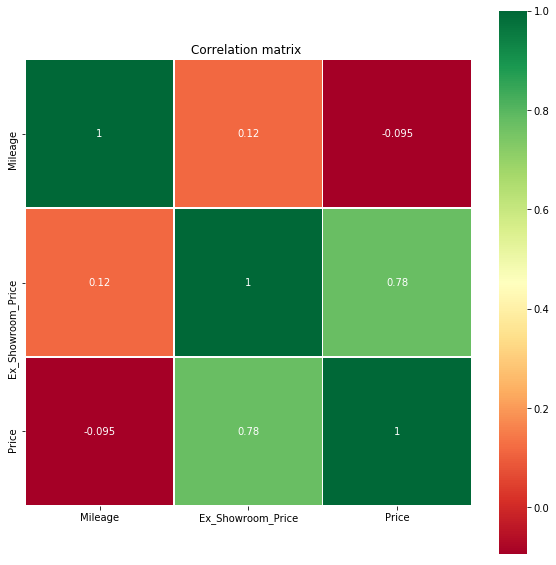

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num_var].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
plt.show()

Though correlation of Mileage with the target variable Price is very less i.e.-0.095,But we cannot drop the Mileage variable as it is important variable to predict price.

C:\Users\NANINE\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


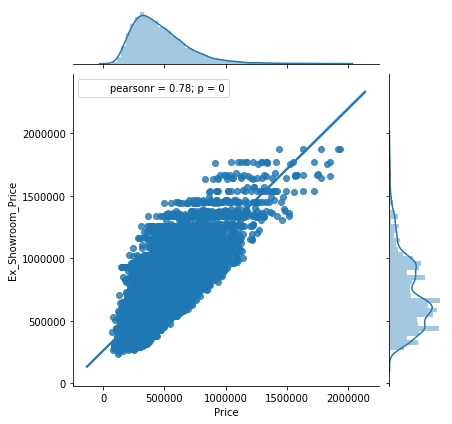

In [22]:
import scipy.stats as stats
sns.jointplot(x='Price',y='Ex_Showroom_Price',data=df1,kind = 'reg').annotate(stats.pearsonr)

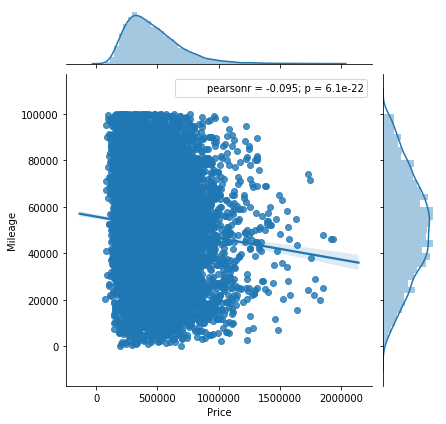

In [23]:
import scipy.stats as stats
sns.jointplot(x='Price',y='Mileage',data=df1,kind = 'reg').annotate(stats.pearsonr)

# Multicollinearity Test for numerical variables using VIF

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

VIF is always greater or equal to 1.

if VIF is 1 --- Not correlated .

if VIF is between 1-5 --- Moderately correlated.

if VIF is above 5 --- Highly correlated.

If there are multiple variables with VIF greater than 5, only remove the variable with the highest VIF.

In [24]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
outcome, predictors = dmatrices('Price ~ Ex_Showroom_Price+Mileage',df1, return_type='dataframe')
# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,11.883792,Intercept
1,1.013672,Ex_Showroom_Price
2,1.013672,Mileage


So we dont have multicollinearity in our dataset for numerical variables as  VIF is approx one.

# Univariate Selection(SelectKBest)

In [26]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [27]:
df1.head()

,Mileage,Ex_Showroom_Price,Price,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti Suzuki,Brand_Renault,Brand_Volkswagen,...,City_Map_Mumbai,City_Map_Pune,Model_Year_2011,Model_Year_2012,Model_Year_2013,Model_Year_2014,Model_Year_2015,Model_Year_2016,Model_Year_2017,Model_Year_2018
0,50074,1335000,582000.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,85086,1257000,532000.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,70000,1186000,441000.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,45000,1376000,815900.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,65000,1309954,648550.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
#Reordering columns

In [29]:
df1 = df1[['Brand_Ford','Brand_Honda','Brand_Hyundai','Brand_Mahindra','Brand_Maruti Suzuki','Brand_Renault','Brand_Volkswagen','City_Map_Mumbai','Car_Type_Compact SUV','Car_Type_Compact Sedan', 'Car_Type_Hatchbacks', 'Car_Type_MPV','Car_Type_Mid Size SUV', 'Car_Type_Premium Hatchbacks','Car_Type_Sedan', 'FTB_Non-Petrol', 'FTB_Petrol', 'City_Map_Ahmedabad','City_Map_Bangalore', 'City_Map_Chennai', 'City_Map_Delhi-NCR','City_Map_Hyderabad', 'City_Map_Kolkata','City_Map_Pune','Model_Year_2011','Model_Year_2012','Model_Year_2013','Model_Year_2014','Model_Year_2015','Model_Year_2016','Model_Year_2017','Model_Year_2018','Mileage','Ex_Showroom_Price','Price']]

In [30]:
df1.head()

,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti Suzuki,Brand_Renault,Brand_Volkswagen,City_Map_Mumbai,Car_Type_Compact SUV,Car_Type_Compact Sedan,...,Model_Year_2012,Model_Year_2013,Model_Year_2014,Model_Year_2015,Model_Year_2016,Model_Year_2017,Model_Year_2018,Mileage,Ex_Showroom_Price,Price
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,50074,1335000,582000.0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,85086,1257000,532000.0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,70000,1186000,441000.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,45000,1376000,815900.0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,65000,1309954,648550.0


In [31]:
df1.shape

(10332, 35)

In [32]:
#f_regression
#F-value between label/feature for regression tasks.

In [33]:
#We assume all features are unimportant as null hypothesis

In [34]:
X = df1.iloc[:,0:34]  #independent columns
y = df1.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_regression, k=34)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfpvalue=pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalue],axis=1)
featureScores.columns = ['Specs','Score','P_value']  #naming the dataframe columns
print(featureScores.nlargest(34,'Score'))  #print  best features

                          Specs         Score        P_value
33            Ex_Showroom_Price  15641.288810   0.000000e+00
10          Car_Type_Hatchbacks   3881.546421   0.000000e+00
3                Brand_Mahindra   2711.320851   0.000000e+00
12        Car_Type_Mid Size SUV   2435.533426   0.000000e+00
14               Car_Type_Sedan    882.655838  3.389583e-186
24              Model_Year_2011    722.211959  7.937583e-154
4           Brand_Maruti Suzuki    553.120271  3.449583e-119
29              Model_Year_2016    458.821075   1.250553e-99
15               FTB_Non-Petrol    374.544785   5.372169e-82
16                   FTB_Petrol    374.544785   5.372169e-82
18           City_Map_Bangalore    287.434813   1.300264e-63
28              Model_Year_2015    266.778448   3.147609e-59
8          Car_Type_Compact SUV    232.756352   5.496332e-52
25              Model_Year_2012    228.718935   3.993156e-51
30              Model_Year_2017    225.773751   1.697533e-50
20           City_Map_De

Now we can see for all above variables F-score is high and p_value is less than 0.05 Except for one variable 'City_Map_Ahmedabad' and City_Map_Pune.Lets drop that column.

In [35]:
df1.drop(['City_Map_Ahmedabad','City_Map_Pune','City_Map_Mumbai','Brand_Volkswagen','Brand_Ford','City_Map_Chennai','Car_Type_Compact Sedan','Model_Year_2014','Car_Type_Premium Hatchbacks','City_Map_Kolkata','Model_Year_2018','Model_Year_2013','City_Map_Hyderabad'],axis=1,inplace=True)

 Model Performance with final feature selection variables only

In [36]:
df1.head()

,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti Suzuki,Brand_Renault,Car_Type_Compact SUV,Car_Type_Hatchbacks,Car_Type_MPV,Car_Type_Mid Size SUV,Car_Type_Sedan,...,City_Map_Bangalore,City_Map_Delhi-NCR,Model_Year_2011,Model_Year_2012,Model_Year_2015,Model_Year_2016,Model_Year_2017,Mileage,Ex_Showroom_Price,Price
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,50074,1335000,582000.0
1,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,85086,1257000,532000.0
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,70000,1186000,441000.0
3,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,45000,1376000,815900.0
4,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,65000,1309954,648550.0


# Feature Scaling

Most of the times, our dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations
we should perform feature scaling

Many algorithm like k-nearest neighbors, computes distance or assumes normality, So we should scale our features!!!

We can speed up gradient descent by scaling.

Let's scale the Ex_Showroom_Price variable using Normalization technique

In [37]:
#Standarization

In [38]:
df2=df1[['Mileage','Ex_Showroom_Price']]

In [39]:
df2.head()

,Mileage,Ex_Showroom_Price
0,50074,1335000
1,85086,1257000
2,70000,1186000
3,45000,1376000
4,65000,1309954


In [40]:
from sklearn import preprocessing
# Get column names first
names =df2.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df2)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [41]:
scaled_df.head(100)

,Mileage,Ex_Showroom_Price
0,-0.066186,2.244511
1,1.538495,1.963643
2,0.847069,1.707981
3,-0.298739,2.392147
4,0.617907,2.154323
...,...,...
95,0.803987,3.360782
96,-0.252907,2.637006
97,0.847069,2.723427
98,1.238294,2.637006


In [42]:
df1.head()

,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti Suzuki,Brand_Renault,Car_Type_Compact SUV,Car_Type_Hatchbacks,Car_Type_MPV,Car_Type_Mid Size SUV,Car_Type_Sedan,...,City_Map_Bangalore,City_Map_Delhi-NCR,Model_Year_2011,Model_Year_2012,Model_Year_2015,Model_Year_2016,Model_Year_2017,Mileage,Ex_Showroom_Price,Price
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,50074,1335000,582000.0
1,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,85086,1257000,532000.0
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,70000,1186000,441000.0
3,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,45000,1376000,815900.0
4,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,65000,1309954,648550.0


In [43]:
df_final=pd.merge(df1, scaled_df, left_index=True, right_index=True,suffixes=('_x', '_scaled'))

In [44]:
df_final.head()

,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti Suzuki,Brand_Renault,Car_Type_Compact SUV,Car_Type_Hatchbacks,Car_Type_MPV,Car_Type_Mid Size SUV,Car_Type_Sedan,...,Model_Year_2011,Model_Year_2012,Model_Year_2015,Model_Year_2016,Model_Year_2017,Mileage_x,Ex_Showroom_Price_x,Price,Mileage_scaled,Ex_Showroom_Price_scaled
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,50074,1335000,582000.0,-0.066186,2.244511
1,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,85086,1257000,532000.0,1.538495,1.963643
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,70000,1186000,441000.0,0.847069,1.707981
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,45000,1376000,815900.0,-0.298739,2.392147
4,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,65000,1309954,648550.0,0.617907,2.154323


In [45]:
df_final.drop(['Mileage_x','Ex_Showroom_Price_x'],inplace=True,axis=1)

In [46]:
df_final.head()

,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti Suzuki,Brand_Renault,Car_Type_Compact SUV,Car_Type_Hatchbacks,Car_Type_MPV,Car_Type_Mid Size SUV,Car_Type_Sedan,...,City_Map_Bangalore,City_Map_Delhi-NCR,Model_Year_2011,Model_Year_2012,Model_Year_2015,Model_Year_2016,Model_Year_2017,Price,Mileage_scaled,Ex_Showroom_Price_scaled
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,582000.0,-0.066186,2.244511
1,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,532000.0,1.538495,1.963643
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,441000.0,0.847069,1.707981
3,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,815900.0,-0.298739,2.392147
4,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,648550.0,0.617907,2.154323


In [47]:
#Now our data is ready for modeling

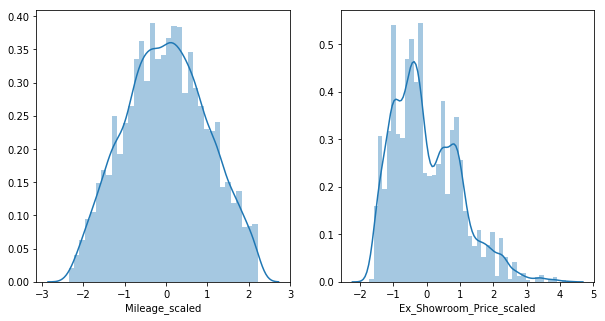

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(df_final['Mileage_scaled'])
plt.subplot(122)
sns.distplot(df_final['Ex_Showroom_Price_scaled'])
plt.show()

# Train/Test split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df_final.drop('Price',axis=1)
y = df_final['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
print(df_final.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(10332, 22) (7232, 21) (3100, 21) (7232,) (3100,)


# Regression Model Performance Metrics

1)RMSE

The Root Mean Squared Error measures the square root of the average of the squared difference between the predictions and the ground truth.

Since the RMSE is squaring the difference between the predictions and the ground truth, any significant difference is made more substantial when it is being squared. 

RMSE is more sensitive to outliers.Hence, if the outliers are undesirable, the RMSE better evaluates how well your model is performing.

2)MAPE

The mean absolute percentage error (MAPE) is the percentage equivalent of MAE.MAPE also has a clear interpretation since percentages are easier for people to conceptualize.

Many of MAPE’s weaknesses actually stem from use division operation. Now that we have to scale everything by the actual value, MAPE is undefined for data points where the value is 0. Similarly, the MAPE can grow unexpectedly large if the actual values are exceptionally small themselves. Finally, the MAPE is biased towards predictions that are systematically less than the actual values themselves.

3) r square

If you like to understand how well the independent variables “explain” the variance in your model, the R-Squared formula can be powerful.

4)Adjusted r square

One of the pitfalls of the R-squared is that it will always improve as we increase the number of variables.Performance cannot decrease because you are including more variables which will make the model better fit the data!
The Adjusted R-Squared fixes this problem. It adds a penalty to the model.

In [52]:
def scores(y, y_):
    print('r square  ', metrics.r2_score(y, y_))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-X_train.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_))) 
def test_scores(model):
    print('<<<------------------- Training Data Score --------------------->')
    print()
    #Predicting result on Training data
    y_pred = model.predict(X_train)
    scores(y_train,y_pred)
    print()
    print('<<<------------------- Test Data Score --------------------->')
    print()
    # Evaluating on Test Set
    y_pred = model.predict(X_test)
    scores(y_test,y_pred)

In [53]:
#libraries used for modeling and evaluation part
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Linear Regression

In [54]:
LR = LinearRegression()
#training the model
LR.fit(X_train,y_train)
#predicting on test
pred_LR = LR.predict(X_test)

In [55]:
coefficients = pd.DataFrame(LR.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
Brand_Honda,44885.589195
Brand_Hyundai,44775.836201
Brand_Mahindra,47466.583567
Brand_Maruti Suzuki,69027.523587
Brand_Renault,-35508.612562
Car_Type_Compact SUV,68610.521728
Car_Type_Hatchbacks,-7149.933722
Car_Type_MPV,54968.799250
Car_Type_Mid Size SUV,11957.971005
Car_Type_Sedan,-35155.786161


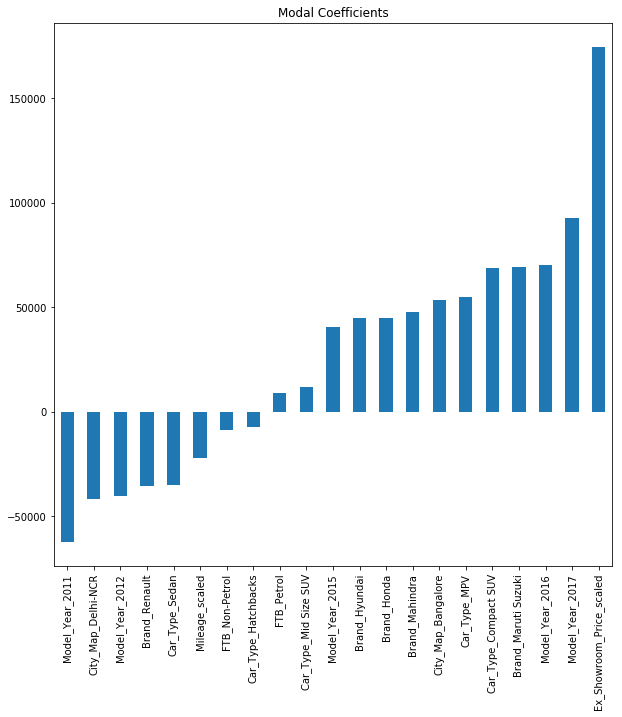

In [56]:
#checking the magnitude of coefficients graphically
predictors = X_train.columns
coef = pd.Series(LR.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients', figsize= (10,10))

In [57]:
# Compute and print the coefficients
LR_coef = LR.coef_
print(LR_coef)
test_scores(LR)

[ 44885.58919542  44775.83620106  47466.58356696  69027.52358719
 -35508.61256203  68610.52172839  -7149.9337221   54968.79925041
  11957.97100494 -35155.78616075  -8673.79364215   8673.79364215
  53486.91871593 -41705.67753083 -62253.52053917 -40539.89554582
  40519.61994682  70157.95056984  92608.87897374 -22112.91352579
 174405.25125556]
<<<------------------- Training Data Score --------------------->

r square   0.706570990883054
Adjusted r square:0.7057163432836842
MAPE:21.507617752224377
RMSE: 119060.04445158603

<<<------------------- Test Data Score --------------------->

r square   0.7191560837509952
Adjusted r square:0.7172399946537797
MAPE:21.863110207718194
RMSE: 122431.75625898005


# Overcome overfitting for a regression model(Regularization)

In [58]:
#Tried  ridge and lasso but no significant change in coefficients.

# Tree Based Algorithm

# To remove overfitting in DT and RF , we will try cross validation and tuning the parameters using gridsearchCV

The Random Forest algorithm does overfit.
The generalization error variance is decreasing to zero in the Random Forest when more trees are added to the algorithm. However, the bias of the generalization does not change.
To avoid overfitting in Random Forest the hyper-parameters of the algorithm should be tuned. For example the number of samples in the leaf.

In [59]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(2,16,2),'min_samples_split': range(2,16,2)}

# Instantiate a Decision Tree regressor: tree
DT = DecisionTreeRegressor()

# Instantiate the gridSearchCV object: tree_cv
DT_cv = GridSearchCV(DT, param_dist, cv=10)

# Fit it to the data
DT_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(DT_cv.best_params_))
print("Best score is {}".format(DT_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 6, 'min_samples_split': 14}
Best score is 0.6646871625395746


In [60]:
# Create the random grid
random_grid = {'n_estimators': range(100,500,100),
               'max_depth': range(5,20,1),
               'min_samples_leaf':range(2,5,1),
              'max_features':['auto','sqrt','log2'],
              'bootstrap': [True, False],
              'min_samples_split': range(2,5,1)}
# Instantiate a Decision Forest Regressor: Forest
RF = RandomForestRegressor()

# Instantiate the gridSearchCV object: Forest_cv
RF_cv = RandomizedSearchCV(RF, random_grid, cv=10)
# Fit it to the data
RF_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(RF_cv.best_params_))
print("Best score is {}".format(RF_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 18, 'bootstrap': True}
Best score is 0.719119773089863


In [61]:
DT = DecisionTreeRegressor(max_depth= 6, min_samples_split=14)
DT.fit(X_train,y_train)
pred_DT = DT.predict(X_test)

In [74]:
RF = RandomForestRegressor(n_estimators=100,min_samples_split=2,min_samples_leaf=4,max_depth=18,bootstrap=True)
RF.fit(X_train,y_train)
pred_RF= RF.predict(X_test)

In [63]:
test_scores(DT)

<<<------------------- Training Data Score --------------------->

r square   0.7016626093970001
Adjusted r square:0.7007936655408749
MAPE:21.994486649030478
RMSE: 120051.71270904964

<<<------------------- Test Data Score --------------------->

r square   0.6923040103604455
Adjusted r square:0.6902047199827878
MAPE:23.14817491746766
RMSE: 128151.14389970807


In [75]:
test_scores(RF)

<<<------------------- Training Data Score --------------------->

r square   0.8434284013321093
Adjusted r square:0.8429723675495815
MAPE:15.31218353623557
RMSE: 86970.30834065015

<<<------------------- Test Data Score --------------------->

r square   0.7262695768086465
Adjusted r square:0.7244020203151382
MAPE:21.706614830802838
RMSE: 120871.2750963614


# k-nearest neighbors algorithm

Selecting n_neighbors value first

In [68]:
from sklearn import neighbors

Selecting the value of n_neighbors by plotting the histogram showing the lowest RMSE value

In [69]:
rmse_l = []
num = []
for n in range(2, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(y_test, pred_knn)))
    num.append(n)

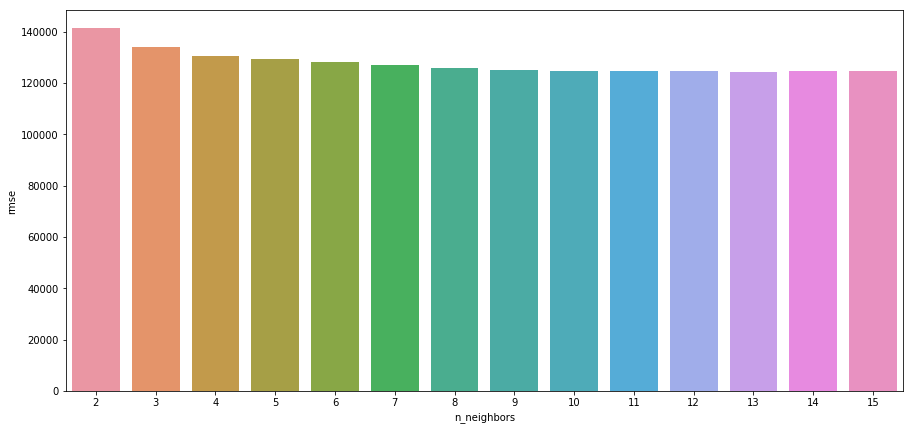

In [70]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()

n_neighbors=9

In [71]:
knn = neighbors.KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [72]:
test_scores(knn)

<<<------------------- Training Data Score --------------------->

r square   0.7515364422367546
Adjusted r square:0.7508127619714248
MAPE:19.701821208253286
RMSE: 109558.44679230949

<<<------------------- Test Data Score --------------------->

r square   0.7069093915395641
Adjusted r square:0.7049097480120563
MAPE:22.404552168272442
RMSE: 125072.69861051896


# Finalize Model

Random Forest model is the best model here because:

1)Highest r square and Adjusted r-square compared to other models.

2)Lowest MAPE compared to other models.

3)Lowest RMSE compared to other models.

# Residual plots 

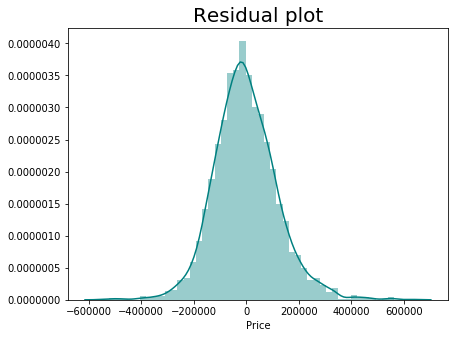

In [76]:
residual = y_test - pred_RF

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.title('Residual plot',fontsize=20)
plt.show()

Residual plot(Error) is normally distributed

In [77]:
A = y_test.values.reshape(-1, 1)
B = pred_RF.reshape(-1, 1)

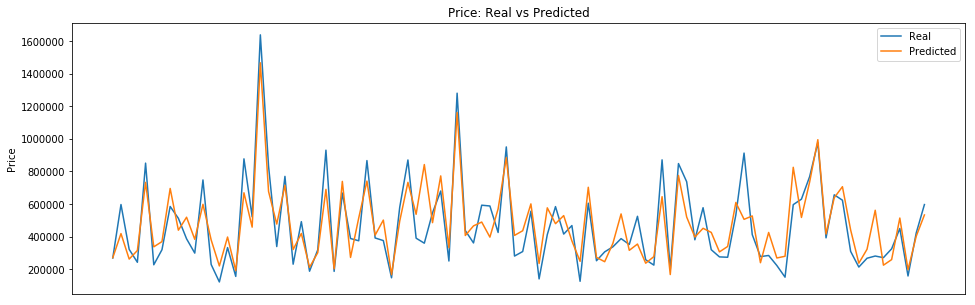

In [78]:
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: Real vs Predicted")
plt.ylabel("Price")
plt.xticks(())
plt.show()